**1. import lib**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

import keras
import matplotlib.pyplot as plt

import tensorflow as tf
print(os.listdir("../input/dogandcat/dogandcat/train"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['cat', 'dog']


**2.EDA**

In [2]:
N_CLASSES = 2
BATCH_SIZE = 64
W = H = 128
classes = ['cat', 'dog']

In [3]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [4]:
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [5]:
train_dataset = train_generator.flow_from_directory(directory='../input/dogandcat/dogandcat/train/',
                                                    target_size=(W, H),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')
print("class indices train_dataset: " + str(train_dataset.class_indices))


test_dataset = test_generator.flow_from_directory(directory='../input/dogandcat/dogandcat/test/',
                                                    target_size=(W, H),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')
print("class indices test_dataset: " + str(train_dataset.class_indices))

Found 153 images belonging to 2 classes.
class indices train_dataset: {'cat': 0, 'dog': 1}
Found 85 images belonging to 2 classes.
class indices test_dataset: {'cat': 0, 'dog': 1}


In [6]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 128, 128, 3)
labels batch shape: (64,)


In [7]:
def show_demo(train_dataset):
    grids = (4,4) # chia theo khổ hiện thi ảnh , ở đây là 16 ảnh theo khổ 4x4
    counter = 0

    plt.figure(figsize=(10,10)) 

    for batch_images, batch_labels in train_dataset:
        i = np.random.randint(len(batch_images))
        img = batch_images[i]
        label = batch_labels[i]

        if(counter < grids[0]*grids[1]):
            counter += 1
        else:
            break

        # plot image and its label
        ax = plt.subplot(grids[0], grids[1], counter) # tạo khổ cho ax
        ax = plt.imshow(img, cmap='brg') # in ảnh ra và fit vào khổ đã tạo
        plt.xticks([]) # bỏ cái đường viền chỉ số cột ox(bình thường là nó có chỉ số)
        plt.yticks([]) # bỏ cái đường viền chỉ số cột oy(bình thường là nó có chỉ số)
        plt.title(classes[int(label)]) # gán tên trùng với tên label cho ảnh

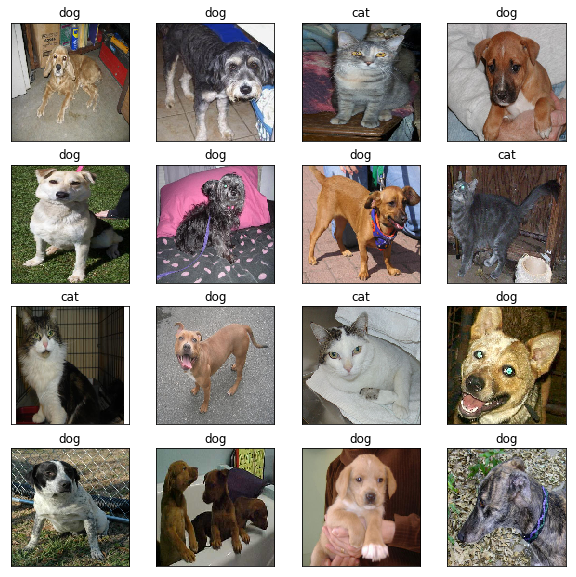

In [8]:
show_demo(train_dataset)

**4.Architect**

In [9]:
from keras import layers
from keras import models
def cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(W, H, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [10]:
model.summary()

NameError: name 'model' is not defined

**5.Compile**

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

NameError: name 'model' is not defined

**6. Fit**

In [12]:
history1 = model.fit_generator(train_dataset, epochs=10, steps_per_epoch=30, validation_data=test_dataset, validation_steps=10)

NameError: name 'model' is not defined

In [13]:
#save model
model.save('cats_and_dogs_small_1.h5')

NameError: name 'model' is not defined

**7. Predict**

In [14]:
test_sample_images, test_sample_labels = next(test_dataset)

In [15]:
# make prediction
predict_sample_labels = (model.predict_on_batch(test_sample_images) > 0.5).astype(int)

NameError: name 'model' is not defined

In [16]:
def test_data(test_sample_images,test_sample_labels,predict_sample_labels):
    grids = (3,3)
    counter = 0

    plt.figure(figsize=(10,10))

    for img, gt_label, predict_label in zip(test_sample_images, test_sample_labels, predict_sample_labels):

        if(counter < grids[0]*grids[1]):
            counter += 1
        else:
            break

        # plot image and its label
        ax = plt.subplot(grids[0], grids[1], counter)
        ax = plt.imshow(img, cmap='brg')
        plt.xticks([])
        plt.yticks([])
        plt.title("Actual: %s    Predict: %s"%(classes[int(gt_label)], classes[int(predict_label)]))

In [17]:
test_data(test_sample_images,test_sample_labels,predict_sample_labels)

NameError: name 'predict_sample_labels' is not defined

**8. Visualize**

In [18]:
import matplotlib.pyplot as plt
def visualize_data(history1):
    acc = history1.history['acc']
    val_acc = history1.history['val_acc']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [19]:
visualize_data(history1)

NameError: name 'history1' is not defined

***II. Augmentation***

In [20]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, 
                                                               brightness_range=(0.5, 2),
                                                               height_shift_range = 0.25,
                                                               width_shift_range = 0.25,
                                                               zoom_range = 0.5,
                                                               shear_range = 0.5,
                                                               horizontal_flip=True)

In [21]:
print(os.listdir("../input/dogandcat/dogandcat/train/dog"))

['89.jpg', '31.jpg', '101.jpg', '107.jpg', '35.jpg', '1.jpg', '93.jpg', '99.jpg', '78.jpg', '90.jpg', '43.jpg', '15.jpg', '113.jpg', '46.jpg', '121.jpg', '16.jpg', '28.jpg', '45.jpg', '71.jpg', '47.jpg', '77.jpg', '85.jpg', '58.jpg', '76.jpg', '65.jpg', '92.jpg', '7.jpg', '102.jpg', '44.jpg', '91.jpg', '74.jpg', '119.jpg', '57.jpg', '79.jpg', '88.jpg', '0.jpg', '33.jpg', '4.jpg', '42.jpg', '60.jpg', '59.jpg', '3.jpg', '8.jpg', '30.jpg', '63.jpg', '86.jpg', '5.jpg', '48.jpg', '106.jpg', '18.jpg', '6.jpg', '116.jpg', '105.jpg', '19.jpg', '114.jpg', '14.jpg', '32.jpg', '61.jpg', '2.jpg', '49.jpg', '73.jpg', '17.jpg', '75.jpg', '103.jpg', '36.jpg', '21.jpg', '29.jpg', '104.jpg', '100.jpg', '20.jpg', '87.jpg', '34.jpg', '117.jpg', '64.jpg', '115.jpg', '120.jpg', '62.jpg', '22.jpg', '72.jpg', '118.jpg', '51.jpg']


In [22]:
# load path image demo
root_dir = "../input/dogandcat/dogandcat/train/dog"
all_path_img_dog = os.listdir(root_dir)
img_path_demo = root_dir +'/'+ all_path_img_dog[0]
print(img_path_demo)

../input/dogandcat/dogandcat/train/dog/89.jpg


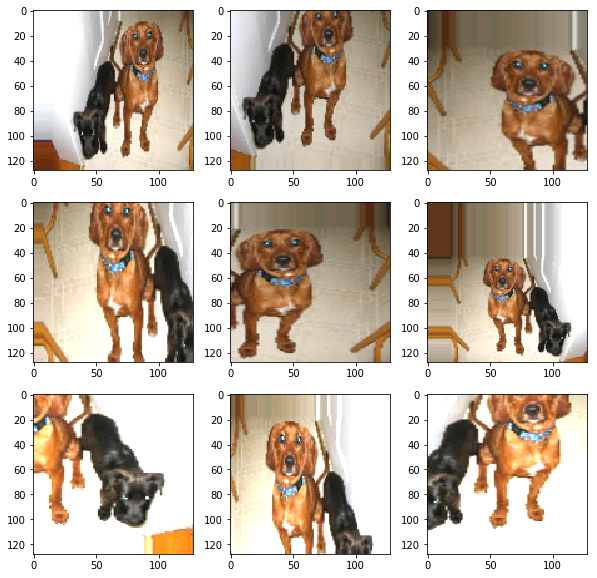

In [23]:
#load image and show demo a image with Augmentation
from keras.preprocessing import image
img = image.load_img(img_path_demo, target_size=(W, H))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

grids = (3,3)
counter = 0
plt.figure(figsize=(10,10))

for batch in train_generator.flow(x, batch_size=1):
    if(counter < grids[0]*grids[1]):
        counter += 1
    else:
        break
    # plot image and its label
    ax = plt.subplot(grids[0], grids[1], counter) # tạo khổ cho ax
    ax = plt.imshow(image.array_to_img(batch[0]))
plt.show()

In [24]:
# load all image for training and testing
train_dataset = train_generator.flow_from_directory(directory='../input/dogandcat/dogandcat/train/',
                                                    target_size=(W, H),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')
print(train_dataset.class_indices)

test_dataset = test_generator.flow_from_directory(directory='../input/dogandcat/dogandcat/test/',
                                                    target_size=(W, H),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')

Found 153 images belonging to 2 classes.
{'cat': 0, 'dog': 1}
Found 85 images belonging to 2 classes.


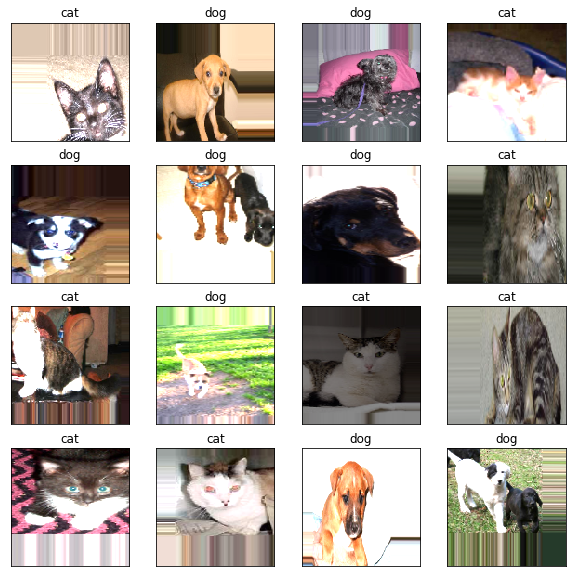

In [25]:
show_demo(train_dataset)

In [26]:
model = cnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [27]:
#Compile and fit
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history_Agu = model.fit_generator(train_dataset, epochs=10, steps_per_epoch=30, validation_data=test_dataset, validation_steps=10)

Epoch 1/10
30/30 [==============================] - 13s 434ms/step - loss: 0.6920 - acc: 0.5152 - val_loss: 0.6781 - val_acc: 0.5294
Epoch 2/10
30/30 [==============================] - 10s 337ms/step - loss: 0.6832 - acc: 0.5625 - val_loss: 0.6671 - val_acc: 0.6000
Epoch 3/10
30/30 [==============================] - 10s 341ms/step - loss: 0.6796 - acc: 0.5638 - val_loss: 0.6659 - val_acc: 0.5529
Epoch 4/10
30/30 [==============================] - 11s 358ms/step - loss: 0.6727 - acc: 0.5863 - val_loss: 0.6598 - val_acc: 0.6235
Epoch 5/10
30/30 [==============================] - 10s 338ms/step - loss: 0.6542 - acc: 0.6226 - val_loss: 0.6455 - val_acc: 0.6471
Epoch 6/10
30/30 [==============================] - 10s 342ms/step - loss: 0.6377 - acc: 0.6441 - val_loss: 0.6496 - val_acc: 0.6000
Epoch 7/10
30/30 [==============================] - 10s 337ms/step - loss: 0.6224 - acc: 0.6669 - val_loss: 0.6297 - val_acc: 0.6471
Epoch 8/10
30/30 [==============================] - 10s 339ms/step - 

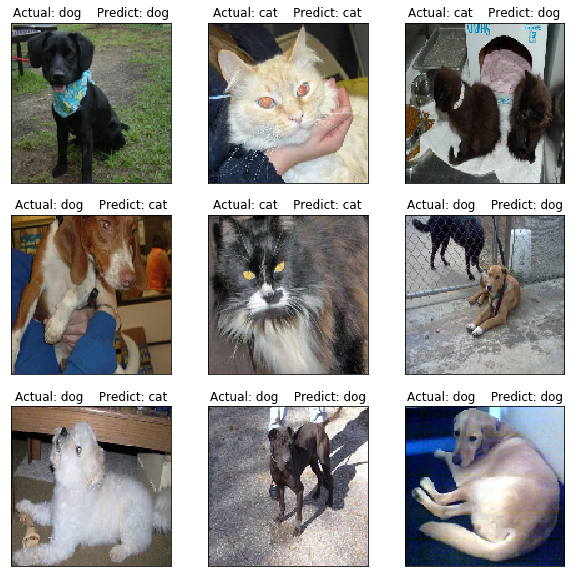

In [28]:
test_sample_images, test_sample_labels = next(test_dataset)

# make prediction
predict_sample_labels = (model.predict_on_batch(test_sample_images) > 0.5).astype(int)
test_data(test_sample_images,test_sample_labels,predict_sample_labels)

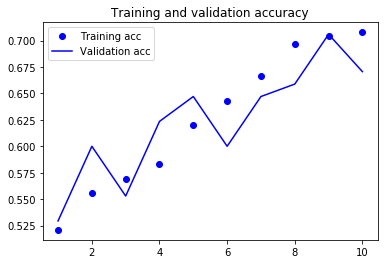

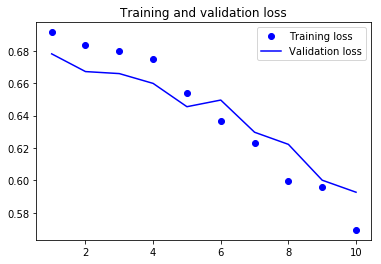

In [29]:
#visualize_data
visualize_data(history_Agu)